In [93]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, Concatenate
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

import numpy as np

from os import listdir
from os.path import isfile, join

import pandas as pd

from PIL import Image
import cv2

from matplotlib import pyplot as plt

%matplotlib inline


In [20]:
def getActiveNeuron(gender):
    if gender == 'male':
        return np.array([1, 0])
    else:
        return np.array([0, 1])

In [86]:
# Generating dataset:

IMAGES_SIZE = (100,100)
datasetbase_path = './hands_dataset/'
datasetless_path = './lessDataset_bregy/'

datasetInfo = pd.read_csv('./HandInfo.csv')
sampleHands = datasetInfo.sample(frac=0.1)

print "Making little dataset with %i images"%len(sampleHands)

images_names = []
for i in xrange(len(sampleHands)):
    iname = sampleHands.iloc[i]['imageName']
    images_names.append(iname)
    img = Image.open(join(datasetbase_path, iname))
    img = img.resize(IMAGES_SIZE)
    img = img.rotate(angle=180)
    img.save(join(datasetless_path, iname))


Making little dataset with 1108 images


In [87]:
labels_gender = []
labels_binary = []
total_images = []

genderToOut = {'male':0, 'female': 1}
sample_by_name = sampleHands.set_index('imageName')
for s in range(len(sample_by_name)):
    
    namei = images_names[s]
    image = cv2.imread(join(datasetless_path, namei))
    total_images.append(image)
    
    
    gender = sample_by_name.loc[namei, 'gender']
    if not 'str' in str(type(gender)):
        labels_gender.append(gender[0])
        labels_binary.append(getActiveNeuron(gender[0]))
    else:
        labels_gender.append(gender)
        labels_binary.append(getActiveNeuron(gender))

total_images = np.array(total_images)
labels_binary = np.array(labels_binary)

labels_bin_one = []
for g in labels_gender:
    labels_bin_one.append(genderToOut[g])
labels_bin_one = np.array(labels_bin_one)

(array([ 388.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  720.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

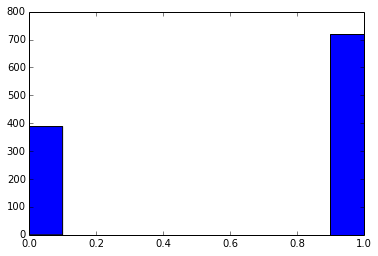

In [88]:
plt.hist(labels_bin_one)

In [89]:
print total_images.shape
print labels_binary.shape
print labels_bin_one.shape

(1108, 100, 100, 3)
(1108, 2)
(1108,)


In [90]:
patterns_extract = Sequential()

patterns_extract.add(Conv2D(16, (3, 3), activation='relu', input_shape=(IMAGES_SIZE[0], IMAGES_SIZE[1], 3)))
patterns_extract.add(Conv2D(16, (3, 3), activation='relu'))
patterns_extract.add(MaxPooling2D(pool_size=(2, 2)))
patterns_extract.add(Dropout(0.25))

patterns_extract.add(Conv2D(32, (3, 3), activation='relu'))
patterns_extract.add(Conv2D(32, (3, 3), activation='relu'))
patterns_extract.add(MaxPooling2D(pool_size=(2, 2)))
patterns_extract.add(Dropout(0.25))

patterns_extract.add(Conv2D(64, (3, 3), activation='relu'))
patterns_extract.add(Conv2D(64, (3, 3), activation='relu'))
patterns_extract.add(MaxPooling2D(pool_size=(2, 2)))
patterns_extract.add(Dropout(0.25))

patterns_extract.add(Flatten())

patterns_extract.add(Dense(2000, activation='relu'))
patterns_extract.add(Dropout(0.5))
patterns_extract.add(Dense(1500, activation='relu'))
patterns_extract.add(Dropout(0.5))
patterns_extract.add(Dense(1500, activation='relu'))
patterns_extract.add(Dropout(0.5))
patterns_extract.add(Dense(1000, activation='relu'))
patterns_extract.add(Dropout(0.5))

patterns_extract.add(Dense(1, activation='sigmoid'))

sgd = SGD(lr=0.12, decay=1e-2)
patterns_extract.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [94]:
patterns_extract.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_117 (Conv2D)          (None, 98, 98, 16)        448       
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 96, 96, 16)        2320      
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 48, 48, 16)        0         
_________________________________________________________________
dropout_105 (Dropout)        (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 46, 46, 32)        4640      
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 44, 44, 32)        9248      
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 22, 22, 32)        0         
__________

In [ ]:
hist = patterns_extract.fit(total_images, labels_bin_one, epochs=100, batch_size=64)

Epoch 1/100
1108/1108 [==============================] - 49s 44ms/step - loss: 9.5779 - acc: 0.4052
Epoch 2/100
1024/1108 [==========================>...] - ETA: 3s - loss: 9.5301 - acc: 0.4082

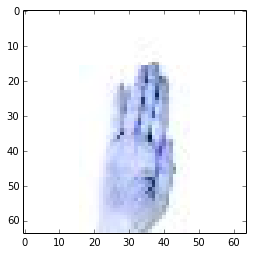

In [85]:
plt.imshow(total_images[30], interpolation='none')

In [14]:
hist.history['loss']

[0.36148237022789809,
 0.34927797895799045,
 0.34927797645653197,
 0.34927797712896708,
 0.34927797963042551,
 0.34927797963042551,
 0.34927798183601255,
 0.34927798067942423,
 0.34927797712896708,
 0.34927797817796574]

(array([ 404.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  704.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

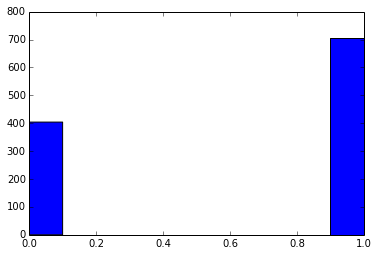

In [86]:
ages= sampleHands.iloc[:]['gender']
agesArr = []
mldict = {'male': 0, 'female':  1}
for i in range(len(ages)):
    agesArr.append(mldict[ages.iloc[i]])
plt.hist(agesArr)

In [24]:
from matplotlib import pyplot as plt
%matplotlib inline